# Stock Market data prediction using Historical Data

## Importing Libraries 

In [148]:
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
import pandas_datareader as web
model = LinearRegression()

# Training and Testing for Different Stock (TATA STEEL)

# Predict next day's close price (Experimental)

In [212]:
# data_num = pd.read_csv('djia.csv')
data_num = web.DataReader('TATAMOTORS.NS', data_source='yahoo', start='2020-01-01', end='2021-01-14')
data_num.reset_index(level=0, inplace=True)
data_num.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
255,2021-01-08,201.500000,197.100006,198.750000,198.149994,53991568.0,198.149994
256,2021-01-11,225.399994,199.649994,199.899994,220.649994,182483100.0,220.649994
257,2021-01-12,252.399994,224.100006,227.000000,237.800003,390577839.0,237.800003
258,2021-01-13,248.800003,238.399994,242.899994,242.600006,164649387.0,242.600006
259,2021-01-14,249.800003,238.600006,242.850006,245.100006,86819519.0,245.100006


In [213]:
data_num['NextOpen'] = 0
# data_num['NextClose'] = 0
data_num['NextHigh'] = 0

In [214]:
data_num.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextHigh
255,2021-01-08,201.500000,197.100006,198.750000,198.149994,53991568.0,198.149994,0,0
256,2021-01-11,225.399994,199.649994,199.899994,220.649994,182483100.0,220.649994,0,0
257,2021-01-12,252.399994,224.100006,227.000000,237.800003,390577839.0,237.800003,0,0
258,2021-01-13,248.800003,238.399994,242.899994,242.600006,164649387.0,242.600006,0,0
259,2021-01-14,249.800003,238.600006,242.850006,245.100006,86819519.0,245.100006,0,0


In [215]:
for i in range(0, len(data_num) - 1):
    data_num.loc[i, 'NextOpen'] = data_num.loc[i+1, 'Open']   
#     data_num.loc[i, 'NextClose'] = data_num.loc[i+1, 'Close']
    data_num.loc[i, 'NextHigh'] = data_num.loc[i+1, 'High']



In [216]:
data_num

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextHigh
0,2020-01-01,186.699997,183.600006,185.149994,184.449997,25968357.0,184.449997,185.000000,194.699997
1,2020-01-02,194.699997,184.600006,185.000000,193.750000,57289863.0,193.750000,192.899994,195.649994
2,2020-01-03,195.649994,189.250000,192.899994,191.100006,47572728.0,191.100006,191.000000,191.000000
3,2020-01-06,191.000000,185.050003,191.000000,185.649994,28621212.0,185.649994,187.000000,189.399994
4,2020-01-07,189.399994,182.300003,187.000000,184.699997,34995035.0,184.699997,180.199997,184.199997
...,...,...,...,...,...,...,...,...,...
255,2021-01-08,201.500000,197.100006,198.750000,198.149994,53991568.0,198.149994,199.899994,225.399994
256,2021-01-11,225.399994,199.649994,199.899994,220.649994,182483100.0,220.649994,227.000000,252.399994
257,2021-01-12,252.399994,224.100006,227.000000,237.800003,390577839.0,237.800003,242.899994,248.800003
258,2021-01-13,248.800003,238.399994,242.899994,242.600006,164649387.0,242.600006,242.850006,249.800003


In [217]:
data_num = data_num[:-1]

In [218]:
data_num

,Date,High,Low,Open,Close,Volume,Adj Close,NextOpen,NextHigh
0,2020-01-01,186.699997,183.600006,185.149994,184.449997,25968357.0,184.449997,185.000000,194.699997
1,2020-01-02,194.699997,184.600006,185.000000,193.750000,57289863.0,193.750000,192.899994,195.649994
2,2020-01-03,195.649994,189.250000,192.899994,191.100006,47572728.0,191.100006,191.000000,191.000000
3,2020-01-06,191.000000,185.050003,191.000000,185.649994,28621212.0,185.649994,187.000000,189.399994
4,2020-01-07,189.399994,182.300003,187.000000,184.699997,34995035.0,184.699997,180.199997,184.199997
...,...,...,...,...,...,...,...,...,...
254,2021-01-07,200.350006,195.100006,197.000000,196.750000,66024848.0,196.750000,198.750000,201.500000
255,2021-01-08,201.500000,197.100006,198.750000,198.149994,53991568.0,198.149994,199.899994,225.399994
256,2021-01-11,225.399994,199.649994,199.899994,220.649994,182483100.0,220.649994,227.000000,252.399994
257,2021-01-12,252.399994,224.100006,227.000000,237.800003,390577839.0,237.800003,242.899994,248.800003


In [219]:
from sklearn.model_selection import train_test_split

In [220]:
X = data_num.drop(['NextHigh','Date','High','Low','Adj Close','Volume'],axis=1)
# X = data_num.drop(['Close','Adj Close'],axis=1)

y = data_num['NextHigh']
X_train, X_test, y_train, y_test = train_test_split(X,y)

model.fit(X_train, y_train)
model.score(X_test,y_test)

0.9921288947519323

In [221]:
y_pred = model.predict(X_test)

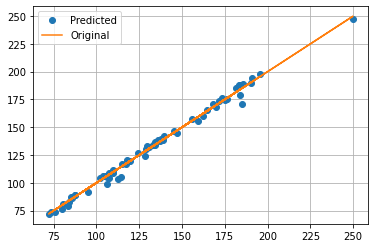

In [222]:
import matplotlib.pyplot as plt
plt.plot(y_test,y_pred,marker='o',linestyle='',label="Predicted")
plt.plot(y_test,y_test, label="Original")

plt.legend(loc='best')
plt.grid()
plt.show()

In [223]:
X_test.tail()

,Open,Close,NextOpen
71,78.300003,76.849998,76.849998
160,122.000000,121.199997,121.800003
232,184.449997,183.550003,184.949997
158,123.449997,121.699997,124.199997
208,133.199997,132.649994,133.649994


In [224]:
predicted_close = model.predict([[712.0,695.650024,695.000000]]) #12 jan

In [225]:
predicted_close

array([703.80033136])

In [226]:
predicted_close = model.predict([[242.850006,245.100006,246.000000]]) #15 jan

In [227]:
predicted_close[0]

251.15996802206422

In [147]:
stocks = int(input())
print(abs(stocks * (701.45 - predicted_close[0])))

200
2177.876300000935


In [229]:
A = 80000/242.85


In [231]:
A * 19


6259.007617871114